In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# For users of the code, the variables are defined as such:
    # km = Monomer to dimer conversion rate
    # kd = Dimer to monomer conversion rate
    # kf = Dimer to monomer conversion rate additional test


# Define the system of differential equations with kd
def system_with_kd(t, y, km, kd):
    M, D = y
    dM_dt = -km * M + kd * D
    dD_dt = -kd * D + km * M
    return [dM_dt, dD_dt]

# Define the system of differential equations with kf
def system_with_kf(t, y, km, kf):
    M, D = y
    dM_dt = -km * M + kf * D
    dD_dt = -kf * D + km * M
    return [dM_dt, dD_dt]

def solve_and_plot(km, kd, M0, D0, title_suffix, kf=None):
    # Initial conditions
    y0 = [M0, D0]

    # Time span
    t_span = (0, 100)
    t_eval = np.linspace(0, 100, 500)

    # Integrate the system with k2
    sol_kd = solve_ivp(system_with_kd, t_span, y0, args=(km, kd), method='RK45', t_eval=t_eval)

    
    # Determine steady state for the system with kd
    steady_state_M_kd = sol_kd.y[0, -1]
    steady_state_D_kd = sol_kd.y[1, -1]
    print(f'Steady state % Monomers with kd = : {steady_state_M_kd}')
    print(f'Steady state % Dimers with kd = : {steady_state_D_kd}')
    
    # Plot the solution with k2
    plt.plot(sol_kd.t, sol_kd.y[0], label='% Monomer with kd')
    plt.plot(sol_kd.t, sol_kd.y[1], label='% Dimer with kd')

    if kf is not None:
        # Integrate the system with kf
        sol_kf = solve_ivp(system_with_kf, t_span, y0, args=(km, kf), method='RK45', t_eval=t_eval)
        
        # Plot the solution with kf
        plt.plot(sol_kf.t, sol_kf.y[0], '--', label='% Monomer with kf')
        plt.plot(sol_kf.t, sol_kf.y[1], '--', label='% Dimer with kf')
        
        # Determine steady state for the system with kf
        steady_state_M_kf = sol_kf.y[0, -1]
        steady_state_D_kf = sol_kf.y[1, -1]
        print(f'Steady state % Monomers with kf = : {steady_state_M_kf}')
        print(f'Steady state % Dimers with kf = : {steady_state_D_kf}')
    
    plt.xlabel('Time')
    plt.ylabel('Percentage')
    plt.legend()
    plt.title(f'Percentages of Monomers and Dimers in {title_suffix}')
    plt.grid()
    plt.show()


Steady state % Monomers with kd = : 100.0
Steady state % Dimers with kd = : 0.0


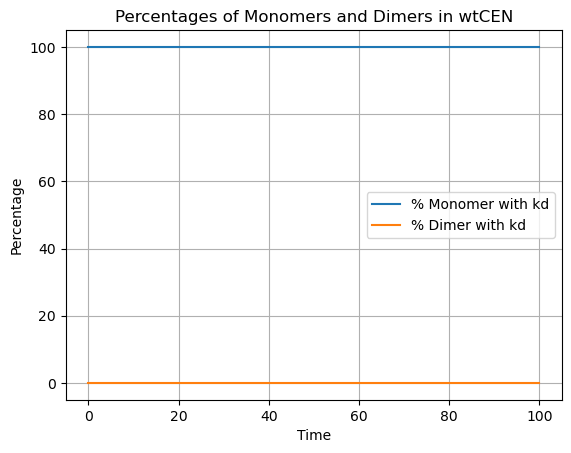

In [9]:
#wtCEN Plot
solve_and_plot(0, 0, 100, 0, "wtCEN")

Steady state % Monomers with kd = : 71.78739172671656
Steady state % Dimers with kd = : 28.21260827328345
Steady state % Monomers with kf = : 68.35546846303944
Steady state % Dimers with kf = : 31.64453153696055


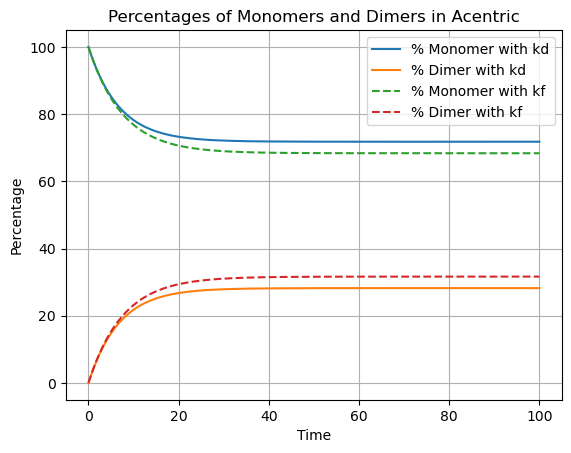

In [10]:
#Acentric Plot
solve_and_plot(2/48, 0.106, 100, 0, "Acentric", kf = 0.09)

Steady state % Monomers with kd = : 28.311027520536133
Steady state % Dimers with kd = : 71.68897247946386
Steady state % Monomers with kf = : 32.439998010267004
Steady state % Dimers with kf = : 67.56000198973298


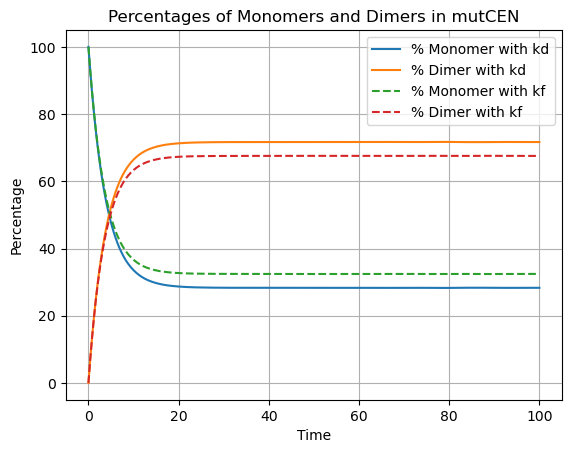

In [11]:
#mutCEN Plot
solve_and_plot(3/16, 0.074, 100, 0, "mutCEN", kf = 0.09)

Steady state % Monomers with kd = : 40.013716560097095
Steady state % Dimers with kd = : 59.986283439902905


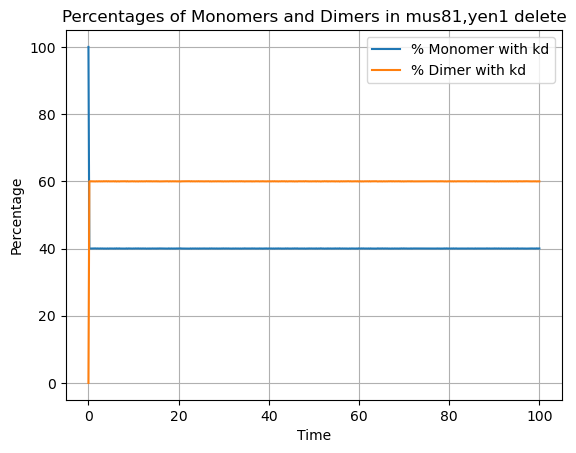

In [14]:
solve_and_plot(135, 90, 100, 0, "mus81,yen1 delete")